Found 1843 validated image filenames belonging to 2 classes.
Found 437 validated image filenames belonging to 2 classes.
Found 235 validated image filenames belonging to 2 classes.


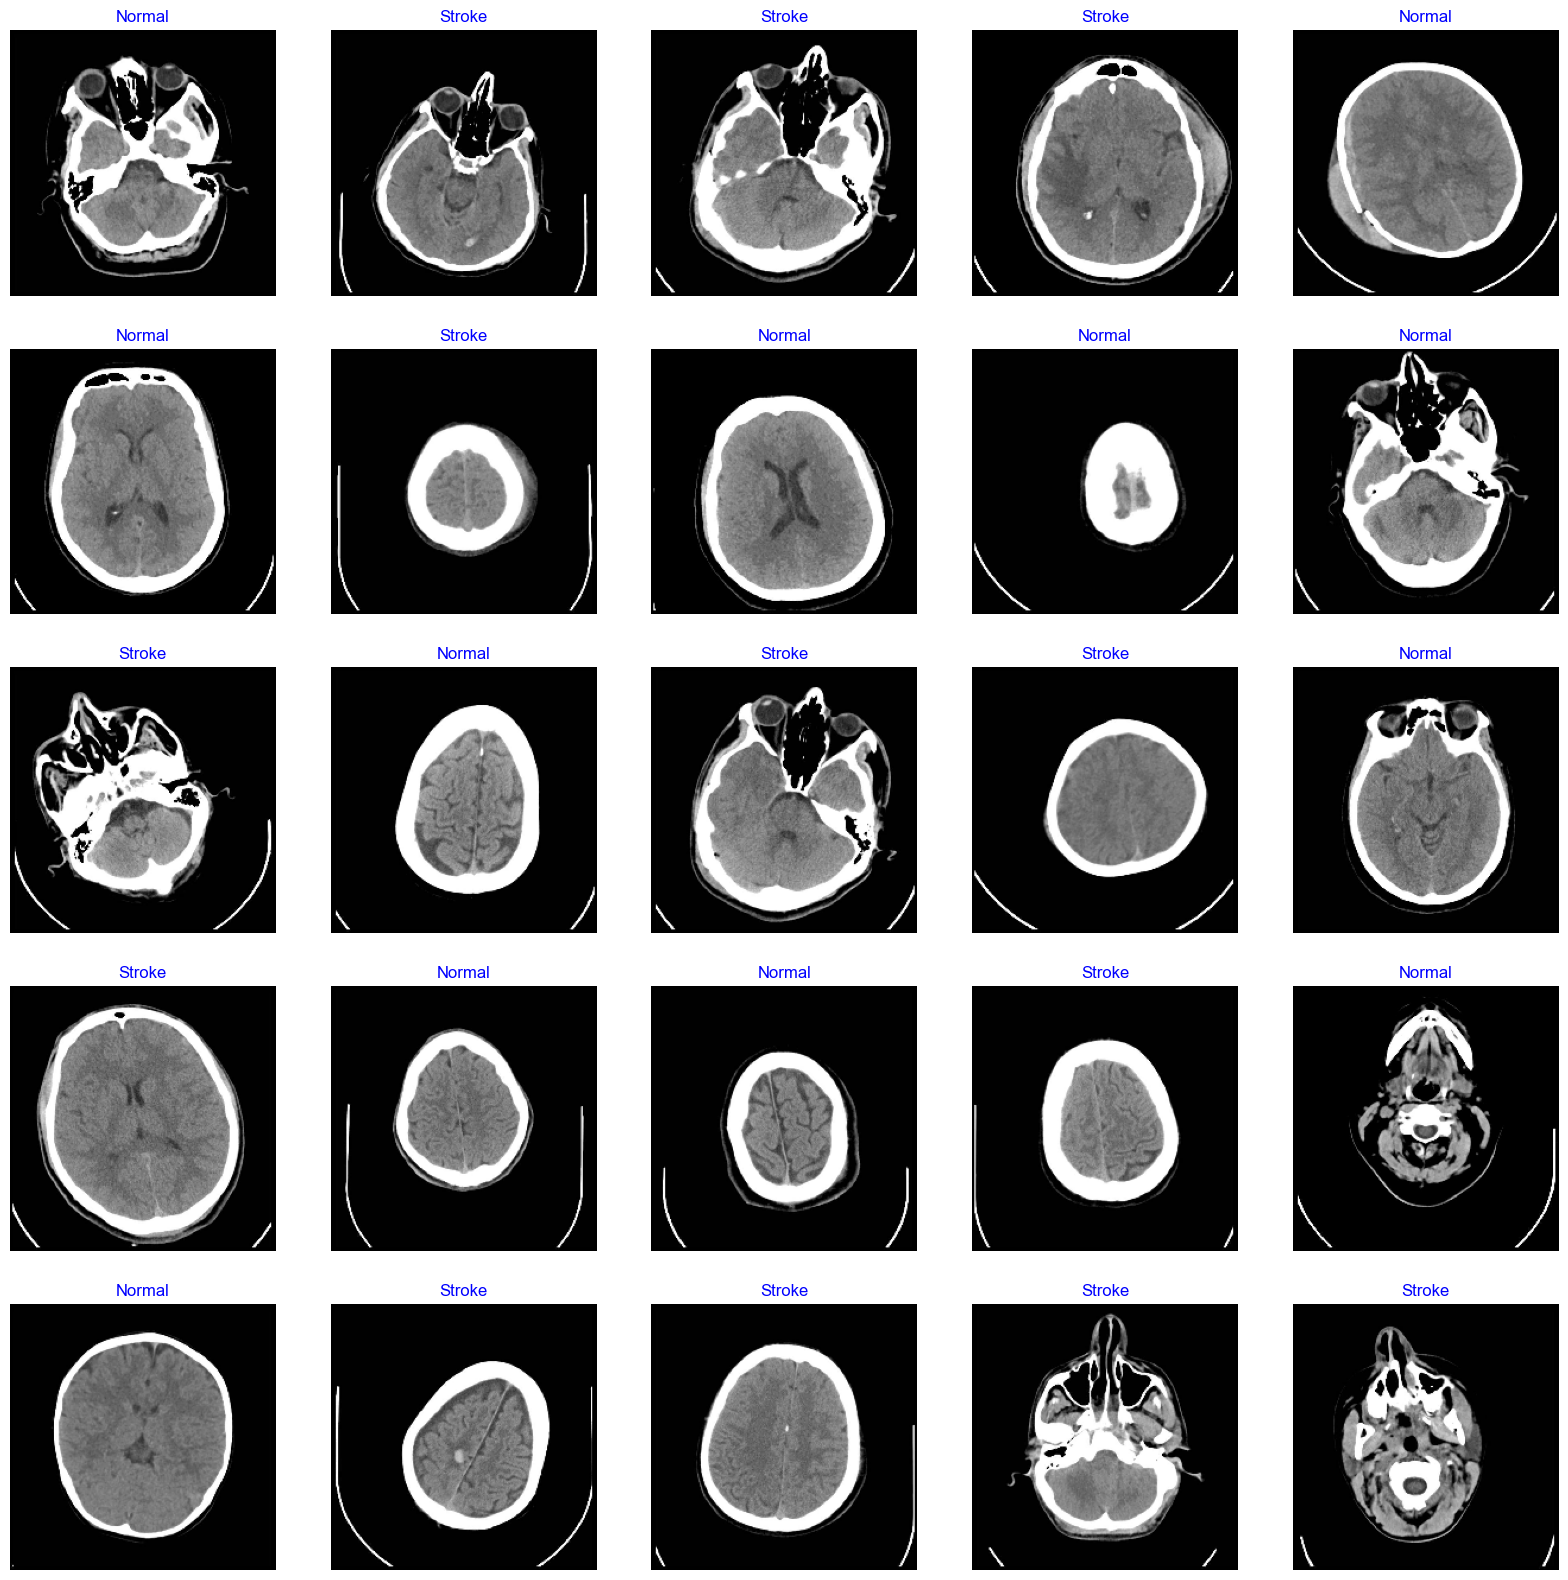

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [1]:
import aiofiles
import pickle
from sklearn.metrics import accuracy_score, classification_report, roc_curve, precision_recall_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib.offsetbox import AnchoredText
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# import system libs 
import os
import itertools

# import data handling tools 
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adamax
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import sklearn
import seaborn as sns
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np  # linear algebra
import warnings
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
from utils import *
from glob import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from itertools import chain
from datetime import datetime
import statistics
from tqdm import tqdm
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.metrics import Accuracy, Precision, Recall, AUC, BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.applications import DenseNet121, DenseNet169, DenseNet201, VGG16, ResNet50
from keras import backend as K
from tensorflow.keras import Sequential
import keras
import matplotlib
from sklearn.metrics import roc_curve, auc, roc_auc_score
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from sklearn.metrics import roc_curve, auc
from fastapi import FastAPI, File, UploadFile, Request
from starlette.responses import FileResponse
from pydantic import BaseModel
app = FastAPI()


warnings.filterwarnings('ignore')


# df = pd.read_csv('healthcare-dataset-stroke-data.csv')
# df.head()
# labels = df['stroke'].value_counts(sort=True).index
# sizes = df['stroke'].value_counts(sort=True)

# le = LabelEncoder()
# en_df = df.apply(le.fit_transform)
# en_df.head()

# df = df.drop('id', axis=1)
# len_data = len(df)
# len_w = len(df[df["gender"] == "Male"])
# len_m = len_data - len_w

# men_stroke = len(df.loc[(df["stroke"] == 1) & (df['gender'] == "Male")])
# men_no_stroke = len_m - men_stroke

# women_stroke = len(df.loc[(df["stroke"] == 1) & (df['gender'] == "Female")])
# women_no_stroke = len_w - women_stroke

# labels = ['Men with stroke', 'Men healthy',
#           'Women with stroke', 'Women healthy']
# values = [men_stroke, men_no_stroke, women_stroke, women_no_stroke]

# features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
#             'work_type', 'Residence_type',
#             'smoking_status']
# correlation_table = []
# for cols in features:
#     y = en_df["stroke"]
#     x = en_df[cols]
#     corr = np.corrcoef(x, y)[1][0]
#     dict = {
#         'Features': cols,
#         'Correlation coefficient': corr,
#         'Feat_type': 'numerical'
#     }
#     correlation_table.append(dict)
# dF1 = pd.DataFrame(correlation_table)


# X = en_df[features]
# y = en_df['stroke']
# en_df_imputed = en_df
# imputer = KNNImputer(n_neighbors=4, weights="uniform")
# imputer.fit_transform(en_df_imputed)

# X, y = en_df_imputed[features], en_df_imputed["stroke"]
# x_train, x_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=23)
# sm = SMOTE()
# X_res, y_res = sm.fit_resample(x_train, y_train)


# data = {'gender': 0,
#         'age': 88, 'hypertension': 0, 'heart_disease': 1, 'ever_married': 1, 'work_type': 2, 'Residence_type': 1, 'smoking_status': 1}
# new = pd.DataFrame.from_dict([data])

# model = KNeighborsClassifier()
# model.fit(x_train, y_train)



@app.get("/")
async def read_items():
    return FileResponse('index.html')




@app.post("/predict")
async def getdata(request: Request):
    try:
        print("here")
        body = await request.json()
        for k, v in body.items():
            body[k] = int(v)

        pdf = pd.DataFrame.from_dict([body])
        print(pdf)
        print("Accuracy of first model(risk factor) :",accuracy_score(y_test, model.predict(x_test)))
        print(model.predict(pdf))
        return str(model.predict(pdf))
    except Exception as e:
        print(e)


def define_paths(dir):
    filepaths = []
    labels = []
    folds = os.listdir(dir)
    for fold in folds:
        foldpath = os.path.join(dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)
    return filepaths, labels

def define_df(files, classes):
    Fseries = pd.Series(files, name= 'filepaths')
    Lseries = pd.Series(classes, name='labels')
    return pd.concat([Fseries, Lseries], axis= 1)

def create_df(tr_dir, val_dir, ts_dir):
    # train dataframe 
    files, classes = define_paths(tr_dir)
    train_df = define_df(files, classes)

    # validation dataframe
    files, classes = define_paths(val_dir)
    valid_df = define_df(files, classes)

    # test dataframe
    files, classes = define_paths(ts_dir)
    test_df = define_df(files, classes)
    return train_df, valid_df, test_df

def create_gens(train_df, valid_df, test_df, batch_size):
    img_size = (224, 224)
    channels = 3
    img_shape = (img_size[0], img_size[1], channels)
    ts_length = len(test_df)
    test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
    test_steps = ts_length // test_batch_size
    def scalar(img):
        return img
    tr_gen = ImageDataGenerator(preprocessing_function= scalar, horizontal_flip= True)
    ts_gen = ImageDataGenerator(preprocessing_function= scalar)
    train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= 'rgb', shuffle= True, batch_size= batch_size)
    valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= 'rgb', shuffle= True, batch_size= batch_size)
    test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= 'rgb', shuffle= False, batch_size= test_batch_size)
    print(test_gen)
    return train_gen, valid_gen, test_gen


def show_images(gen):
    g_dict = gen.class_indices        
    classes = list(g_dict.keys())    
    images, labels = next(gen)       
    plt.figure(figsize= (20, 20))
    length = len(labels)             
    sample = min(length, 25)         
    for i in range(sample):
        plt.subplot(5, 5, i + 1)
        image = images[i] / 255       
        plt.imshow(image)
        index = np.argmax(labels[i])  
        class_name = classes[index]   
        plt.title(class_name, color= 'blue', fontsize= 12)
        plt.axis('off')
    plt.show()

def plot_training(hist):
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)    
    val_lowest = val_loss[index_loss]    
    index_acc = np.argmax(val_acc)      
    acc_highest = val_acc[index_acc]    

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    Epochs = [i+1 for i in range(len(tr_acc))]	      
    loss_label = f'best epoch= {str(index_loss + 1)}' 
    acc_label = f'best epoch= {str(index_acc + 1)}'    
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout
    plt.show()

def plot_confusion_matrix(cm, classes, normalize= False, title= 'Confusion Matrix', cmap= plt.cm.Blues):
	plt.figure(figsize= (10, 10))
	plt.imshow(cm, interpolation= 'nearest', cmap= cmap)
	plt.title(title)
	plt.colorbar()
	tick_marks = np.arange(len(classes))
	plt.xticks(tick_marks, classes, rotation= 45)
	plt.yticks(tick_marks, classes)
	if normalize:
		cm = cm.astype('float') / cm.sum(axis= 1)[:, np.newaxis]
		print('Normalized Confusion Matrix')
	else:
		print('Confusion Matrix, Without Normalization')
	print(cm)
	thresh = cm.max() / 2.
	for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')
	plt.tight_layout()
	plt.ylabel('True Label')
	plt.xlabel('Predicted Label')

train_dir = 'Brain_Stroke_CT-SCAN_image/Train'
valid_dir = 'Brain_Stroke_CT-SCAN_image/Test'
test_dir = 'Brain_Stroke_CT-SCAN_image/Validation'
train_df, valid_df, test_df = create_df(train_dir, valid_dir, test_dir)

# Get Generators
batch_size = 40
train_gen, valid_gen, test_gen = create_gens(train_df, valid_df, test_df, batch_size)

show_images(train_gen)

img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))

model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(256,activation = "relu"),
    Dense(64,activation = "relu"),
    Dense(class_count, activation = "softmax")
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

In [2]:

from keras import models

history = model.fit(x= train_gen, epochs= 40, verbose= 1, validation_data= valid_gen, 
                    validation_steps= None, shuffle= False, initial_epoch= 0)
model.save("model.h5")

ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size
train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])



Epoch 1/40
47/47 [==============================] - 673s 14s/step - loss: 5.2049 - accuracy: 0.5833 - val_loss: 0.5997 - val_accuracy: 0.7025
Epoch 2/40
47/47 [==============================] - 659s 14s/step - loss: 0.6718 - accuracy: 0.5931 - val_loss: 0.5874 - val_accuracy: 0.6911
Epoch 3/40
47/47 [==============================] - 670s 14s/step - loss: 0.6488 - accuracy: 0.6267 - val_loss: 0.5340 - val_accuracy: 0.6979
Epoch 4/40
47/47 [==============================] - 674s 14s/step - loss: 0.5995 - accuracy: 0.6696 - val_loss: 0.6034 - val_accuracy: 0.6888
Epoch 5/40
47/47 [==============================] - 672s 14s/step - loss: 0.5889 - accuracy: 0.6598 - val_loss: 0.5304 - val_accuracy: 0.7643
Epoch 6/40
47/47 [==============================] - 671s 14s/step - loss: 0.5617 - accuracy: 0.7130 - val_loss: 0.4748 - val_accuracy: 0.7872
Epoch 7/40
47/47 [==============================] - 671s 14s/step - loss: 0.4821 - accuracy: 0.7689 - val_loss: 0.5868 - val_accuracy: 0.7094
Epoch 